In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Tin_data.csv') 

X = data.drop(columns=['Bandgap'])
y = data['Bandgap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge_model = Ridge(alpha=1.0) 

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.0803949778622236
R-squared (R2): 0.5180112052175332


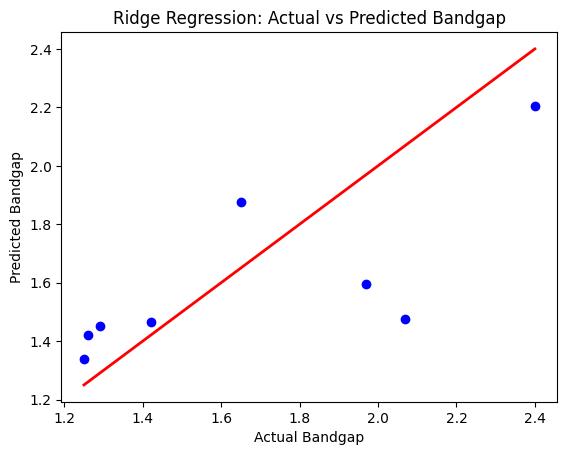

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  
plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.title('Ridge Regression: Actual vs Predicted Bandgap')
plt.show()